In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Get Data

In [57]:
init_data = pd.read_csv("./merged_data.csv")

In [58]:
select_columns = ['Total.Cup.Points', 'Species','Country.of.Origin','Processing.Method', 'Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']

In [59]:
init_data  = init_data[select_columns]

In [60]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1339 non-null   float64
 1   Species               1339 non-null   object 
 2   Country.of.Origin     1338 non-null   object 
 3   Processing.Method     1169 non-null   object 
 4   Aroma                 1339 non-null   float64
 5   Flavor                1339 non-null   float64
 6   Aftertaste            1339 non-null   float64
 7   Acidity               1339 non-null   float64
 8   Body                  1339 non-null   float64
 9   Balance               1339 non-null   float64
 10  Uniformity            1339 non-null   float64
 11  Moisture              1339 non-null   float64
 12  altitude_mean_meters  1109 non-null   float64
dtypes: float64(10), object(3)
memory usage: 136.1+ KB


# Processing Data / Preparation 

In [61]:
init_data['Species'].unique()

array(['Arabica', 'Robusta'], dtype=object)

In [62]:
init_data['Country.of.Origin'].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [63]:
init_data['Processing.Method'].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

In [67]:
def find_null(data) :
    null_data = data[data.isnull().any(axis=1)]
    return null_data

In [69]:
find_null(init_data)

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
2,89.75,Arabica,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,0.00,1700.0
5,88.83,Arabica,Brazil,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,0.11,NaN
6,88.75,Arabica,Peru,Washed / Wet,8.42,8.50,8.33,8.50,8.25,8.25,10.00,0.11,NaN
7,88.67,Arabica,Ethiopia,NaN,8.25,8.33,8.50,8.42,8.33,8.50,10.00,0.03,1635.0
8,88.42,Arabica,Ethiopia,NaN,8.67,8.67,8.58,8.42,8.33,8.42,9.33,0.03,1635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,80.17,Robusta,India,NaN,7.67,7.67,7.50,7.33,7.58,7.50,10.00,0.00,750.0
1334,78.75,Robusta,Ecuador,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,0.00,NaN
1335,78.08,Robusta,Ecuador,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,0.00,40.0
1337,75.08,Robusta,India,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,0.10,NaN


In [70]:
init_data = init_data.dropna()

In [73]:
init_data['Country.of.Origin'].unique()

array(['Ethiopia', 'United States', 'China', 'Costa Rica', 'Mexico',
       'Brazil', 'Uganda', 'Taiwan', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Guatemala', 'Papua New Guinea', 'El Salvador',
       'Indonesia', 'Tanzania, United Republic Of', 'Honduras', 'Japan',
       'Nicaragua', 'Ecuador', 'United States (Puerto Rico)', 'Haiti',
       'Burundi', 'Vietnam', 'Philippines', 'Rwanda', 'Malawi', 'Laos',
       'Zambia', 'Myanmar', 'Cote d?Ivoire', 'Peru', 'India'],
      dtype=object)

In [74]:
init_data['Processing.Method'].unique()

array(['Washed / Wet', 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

In [75]:
init_data.describe()

,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,82.115577,7.567897,7.514294,7.386772,7.527196,7.505656,7.500622,9.869516,0.094689,1813.965837
std,2.626653,0.300706,0.323467,0.332248,0.307302,0.272702,0.340476,0.444271,0.043684,9067.972349
min,59.830000,5.080000,6.170000,6.170000,5.250000,6.330000,6.080000,6.000000,0.000000,1.000000
25%,81.170000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,0.100000,1100.000000
50%,82.420000,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,0.110000,1310.640000
75%,83.580000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,0.120000,1600.000000
max,90.580000,8.750000,8.830000,8.670000,8.750000,8.500000,8.580000,10.000000,0.170000,190164.000000


# Split X and Y

In [99]:
Y = init_data['Total.Cup.Points']
X = init_data.iloc[:-1,1:]

In [100]:
X.head()

,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,0.12,2075.0
1,Arabica,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,0.12,2075.0
3,Arabica,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,0.11,2000.0
4,Arabica,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,0.12,2075.0
9,Arabica,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.0,0.10,1822.5


In [113]:
std = StandardScaler()

In [116]:
numberic_col = ['Aroma' ,'Flavor' ,'Aftertaste' ,'Acidity' ,'Balance' ,'Uniformity' ,'Moisture' ,'altitude_mean_meters']

In [131]:
x_std= std.fit_transform(X[numberic_col])
x_outlier_checking = pd.DataFrame(x_std,columns=numberic_col)
x_outlier_checking.head()

,Aroma,Flavor,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.665407,4.067607,3.862429,3.979048,2.700574,0.292717,0.578609,0.028676
1,3.931530,3.572886,3.350655,3.425813,2.700574,0.292717,0.578609,0.028676
2,2.002137,3.294605,3.109820,2.905122,2.201040,0.292717,0.349161,0.020405
3,2.268260,3.047245,2.598047,3.165468,2.436115,0.292717,0.578609,0.028676
4,1.702748,3.294605,3.350655,3.165468,2.700574,0.292717,0.119712,0.000830


In [132]:
x_outlier_checking.describe()

,Aroma,Flavor,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters
count,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03
mean,1.246039e-15,6.502093e-15,-4.934459e-15,3.847987e-15,2.176728e-15,-5.778864e-15,-7.468773e-16,1.785462e-17
std,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00
min,-8.276872e+00,-4.157128e+00,-3.663657e+00,-7.411067e+00,-4.175367e+00,-8.717379e+00,-2.174772e+00,-2.000430e-01
25%,-4.927684e-01,-5.704017e-01,-6.532226e-01,-6.420848e-01,-5.023216e-01,2.927168e-01,1.197122e-01,-7.884642e-02
50%,3.947801e-02,-4.476075e-02,9.938598e-02,-8.885061e-02,-2.787449e-03,2.927168e-01,3.491606e-01,-5.561727e-02
75%,6.049898e-01,4.808802e-01,5.810555e-01,4.643835e-01,4.967467e-01,2.927168e-01,5.786091e-01,-2.370696e-02
max,3.931530e+00,4.067607e+00,3.862429e+00,3.979048e+00,3.170724e+00,2.927168e-01,1.725851e+00,2.077093e+01


In [135]:
fig = px.box(x_outlier_checking)
fig.show()

# Correlation Detect

In [150]:
X_std = x_outlier_checking
X_corr = X_std.corr()

<AxesSubplot:>

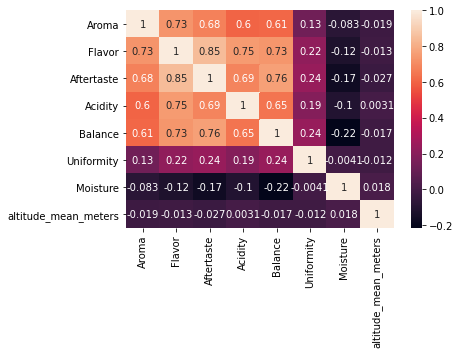

In [152]:
sns.heatmap(X_corr ,annot=True)

# Prepare Y 

In [137]:
Bean_Grade = [1,2,3]

In [138]:
rating_pctile = np.percentile( Y, [75, 90])

In [139]:
rating_pctile

array([83.58, 84.58])